In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [3]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])
my_data

array([0.18 , 0.277, 0.105, 0.126, 0.225, 0.026, 0.123, 0.423, 0.006,
       0.281, 0.05 , 0.692, 0.105, 0.275, 0.346, 0.079, 0.045, 0.222,
       0.063, 0.281])

In [5]:
barx = np.mean(my_data)
1/barx

5.089058524173028

In [6]:
np.sum(my_data)

3.93

In [11]:
((3**20)*(e**(-3*3.93)))/((5.089**20)*(e**(-5.089*3.93)))

0.09445694292170177

In [12]:
-2*log(0.09445694292170177)

4.7192223575434395

In [13]:
1-stats.chi2.cdf(4.729,1)

0.029658123976030737

P-value is near 0.03, so we reject the null hypothesis

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [15]:
crit= stats.chi2.ppf(0.95,1)

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [20]:
data = stats.expon.rvs(size=20,scale=1/5)

In [22]:
n = 20
lam0 = 3
ts = []
for _ in np.arange(10000):
    data = stats.expon.rvs(size=20,scale=1/5)
    test_stat = -2*log((np.mean(data)**n)*(lam0**n)*e**(-lam0*sum(data)+n))
    ts=np.append(ts,test_stat)
np.mean(ts>=crit)

0.6038

Repeat for a sample size of 50. What do you expect to happen to power? 

In [24]:
n = 50
lam0 = 3
ts = []
for _ in np.arange(10000):
    data = stats.expon.rvs(size=n,scale=1/5)
    test_stat = -2*log((np.mean(data)**n)*(lam0**n)*e**(-lam0*sum(data)+n))
    ts=np.append(ts,test_stat)
np.mean(ts>=crit)

0.9526

The power went up and this is what we would expect to happen because power and sample size are directly correlated.

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

In [5]:
obsmean =  np.mean(my_data)

In [8]:
ts = [np.mean(stats.expon.rvs(scale=1/3, size = 20)) for _ in np.arange(10000)]

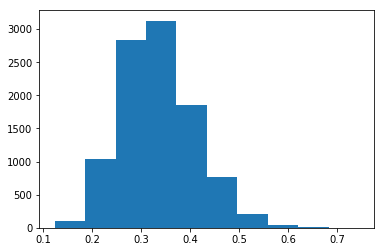

In [9]:
plt.hist(ts);

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

In [10]:
2*np.mean(ts<=obsmean)

0.0364

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [13]:
lower,upper= np.percentile(ts,[2.5,97.5])
print(lower)
print(upper)

0.20369536845451375
0.4992443905435522


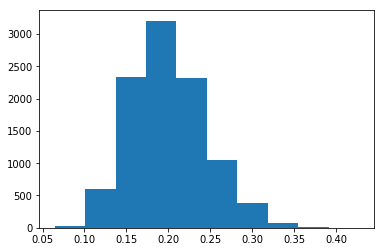

In [15]:
tsp=[np.mean(stats.expon.rvs(scale=1/5,size=20)) for _ in np.arange(10000)]
plt.hist(tsp);

In [16]:
np.mean(tsp<=lower)+np.mean(tsp>=upper)

0.5618

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [17]:
ts = [np.mean(stats.expon.rvs(scale=1/3, size = 20)) for _ in np.arange(10000)]
lower,upper= np.percentile(ts,[2.5,97.5])
tsp=[np.mean(stats.expon.rvs(scale=1/5,size=20)) for _ in np.arange(10000)]
np.mean(tsp<=lower)+np.mean(tsp>=upper)

0.5653

The power for a sample size of 20 is 0.56 which is less that the maximum liklihood power for this sample size.

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [20]:
ts50 = [np.mean(stats.expon.rvs(scale=1/3, size = 50)) for _ in np.arange(10000)]
lower50,upper50= np.percentile(ts50,[2.5,97.5])
tsp50=[np.mean(stats.expon.rvs(scale=1/5,size=50)) for _ in np.arange(10000)]
np.mean(tsp50<=lower50)+np.mean(tsp50>=upper50)

0.9469

The power for a sample size of 50 is 0.94 which is significantly higher than the power for a sample size of 20 but it is still less than the power for a maximum liklihood test with the same sample size of 50. This shows how power is always best for a maximum liklihood test.